# 1번

In [ ]:
# *모든 문제는 분석 및 시각화를 진행해야 합니다.
# 1. tmdb_5000_movies 데이터 셋 분석
# 1) 예산과 장르 관계?
# 2) 키워드로 많이 사용된 단어는? 
# 3) 장르와 키워드 관계는?
# 4) 평균 평점과 장르 사이의 관계?
# 5) 연도별로 많이 제작된 영화 장르는?
# 6) 인기도와 예산 관계는?
# 7) 영화 run time과 인기도 사이에 관계가 있을까?

In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

In [4]:
df1=pd.read_csv("test1125/tmdb_5000_movies.csv")
df1

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ... 

In [7]:
# 1) 예산과 장르 관계?
# 먼저 장르와 키워드만 추출하기
from ast import literal_eval
df1['genres']=df1['genres'].apply(literal_eval)
df1['keywords']=df1['keywords'].apply(literal_eval)

In [8]:
df1['genres']=df1['genres'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x)) # 딕셔너리의 'name'키
df1['keywords']=df1['keywords'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x)) # 딕셔너리의 'name'키

In [9]:
df1

budget                                    genres  \
0     237000000  Action Adventure Fantasy Science Fiction   
1     300000000                  Adventure Fantasy Action   
2     245000000                    Action Adventure Crime   
3     250000000               Action Crime Drama Thriller   
4     260000000          Action Adventure Science Fiction   
...         ...                                       ...   
4798     220000                     Action Crime Thriller   
4799       9000                            Comedy Romance   
4800          0             Comedy Drama Romance TV Movie   
4801          0                                             
4802          0                               Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     culture clash future space war space colony so...                en   
1     ocean drug abuse exotic island east india trad...                en   
2     spy based on novel secret agent sequel mi6 bri...                en   
3     dc comics crime fighter terrorist secret ident...                en   
4     based on novel mars medallion space travel pri...                en   
...                                                 ...               ...   
4798  united states–mexico barrier legs arms paper k...                es   
4799                                                                   en   
4800  date love at first sight narration investigati...                en   
4801                                                                   en   
4802               obsession camcorder crush dream girl                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ...    1.929883   

                                   production_companies  \
0     [{"name": "Ingenious Film P

In [13]:
df1['budget'].corr(df1['keywords'], method ='kendall')
# 0.06863868438627731
# 영화 예산과 키워드간의 상관관계는 높은 편은 아니지만 양의 상관관계를 가진다.

0.06863868438627731

In [21]:
# 2) 키워드로 많이 사용된 단어는? 
df1['keywords'].value_counts()
# 412
# independent film   

                                                                                                                                                                                                       412
independent film                                                                                                                                                                                        55
woman director                                                                                                                                                                                          42
duringcreditsstinger                                                                                                                                                                                    15
sport                                                                                                                                                                                       

In [22]:
# 3) 장르와 키워드 관계는?
df1['genres'].corr(df1['keywords'], method ='kendall')
# -0.0020573511480663827
# 장르와 키워드의 상관관계는 음의 상관관계를 가지고 있다.
# 서로에게 영향을 주지 않는다.

-0.0020573511480663827

In [25]:
# 4) 평균 평점과 장르 사이의 관계?
df1['vote_average'].corr(df1['genres'], method ='kendall')
# 0.05480504757699874
# 평점과 장르 사이의 상관관계는 낮지만 양의 상관관계를 가지고 있다.

0.05480504757699874

In [28]:
# 5) 연도별로 많이 제작된 영화 장르는?
# 우선 연도를 추출한다
df1['release_date']  # dtype: object

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [41]:
df1['release_date']=df1['release_date'].astype(str)
df1['year']=df1['release_date'].apply(lambda x : x[0:4])

In [46]:
df1.groupby('year')[['genres']].max()

genres
year                                   
1916                              Drama
1925                  Drama Romance War
1927              Drama Science Fiction
1929             Drama Thriller Romance
1930               Action Drama History
...                                 ...
2014                      Western Drama
2015   Western Drama Adventure Thriller
2016  War Action Drama History Thriller
2017                Comedy Family Drama
nan                                    

[91 rows x 1 columns]

In [48]:
# 6) 인기도와 예산 관계는?
df1['popularity'].corr(df1['budget'], method ='kendall')
# 0.4715287913713281
# 인기도와 예산 사이의 상관관계는 양의 상관관계로 가졌으며 상관계수가 높다.
# 인기도가 높을수록 예산도 같이 상승할것이다.

0.4715287913713281

In [49]:
# 7) 영화 run time과 인기도 사이에 관계가 있을까?
df1['popularity'].corr(df1['runtime'], method ='kendall')
# 0.20834263141785103
# 영화와 runtime간의 상관관계는 그리 높지 않지만, 양의 상관관계를 가진다.

0.20834263141785103

In [52]:
# 그렇다면 영화의 인기도와 가장 높은 상관관계를 가진 변수는?
df1.corrwith(df1['popularity'], method='spearman')
# vote_count      0.959807
# 투표수에 따라 인기도가 높은 것으로 보아, 인기도는 투표의 결과인듯하다

budget          0.649466
id             -0.277905
popularity      1.000000
revenue         0.776679
runtime         0.302288
vote_average    0.359288
vote_count      0.959807
dtype: float64

In [54]:
df1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'year'],
      dtype='object')

# 2번

In [ ]:
# 2. tmdb_5000_movies 데이터 기반 추천시스템 제작

In [56]:
df1.isnull().sum()
# homepage, tagline 컬럼에 결측값이 있다 -> 사용하지 않을것이므로 따로 처리해주지 않음                  

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
year                       0
dtype: int64

In [55]:
# 영어로 된 영화만 추출
movie_data=df1[df1['original_language']=='en'].reset_index(drop=True) # 32269 rows × 24 columns
movie_data

budget                                    genres  \
0     237000000  Action Adventure Fantasy Science Fiction   
1     300000000                  Adventure Fantasy Action   
2     245000000                    Action Adventure Crime   
3     250000000               Action Crime Drama Thriller   
4     260000000          Action Adventure Science Fiction   
...         ...                                       ...   
4500          0                          Foreign Thriller   
4501       9000                            Comedy Romance   
4502          0             Comedy Drama Romance TV Movie   
4503          0                                             
4504          0                               Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4500                                                NaN   67238   
4501                                                NaN   72766   
4502  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4503                        http://shanghaicalling.com/  126186   
4504                                                NaN   25975   

                                               keywords original_language  \
0     culture clash future space war space colony so...                en   
1     ocean drug abuse exotic island east india trad...                en   
2     spy based on novel secret agent sequel mi6 bri...                en   
3     dc comics crime fighter terrorist secret ident...                en   
4     based on novel mars medallion space travel pri...                en   
...                                                 ...               ...   
4500                                                                   en   
4501                                                                   en   
4502  date love at first sight narration investigati...                en   
4503                                                                   en   
4504               obsession camcorder crush dream girl                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4500                                    Cavite   
4501                                 Newlyweds   
4502                 Signed, Sealed, Delivered   
4503                          Shanghai Calling   
4504                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4500  Adam, a security guard, travels from Californi...    0.022173   
4501  A newlywed couple's honeymoon is upended by th...    0.642552   
4502  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4503  When ambitious New York attorney Sam is sent t...    0.857008   
4504  Ever since the second grade when he first saw ...    1.929883   

                                   production_companies  ... release_date  \
0     [{"name":

In [73]:
# 필요한 컬럼만 추출
movie= df1[['id','genres', 'vote_average', 'vote_count','popularity','title',  'keywords', 'overview']]
movie

id                                    genres  vote_average  \
0      19995  Action Adventure Fantasy Science Fiction           7.2   
1        285                  Adventure Fantasy Action           6.9   
2     206647                    Action Adventure Crime           6.3   
3      49026               Action Crime Drama Thriller           7.6   
4      49529          Action Adventure Science Fiction           6.1   
...      ...                                       ...           ...   
4798    9367                     Action Crime Thriller           6.6   
4799   72766                            Comedy Romance           5.9   
4800  231617             Comedy Drama Romance TV Movie           7.0   
4801  126186                                                     5.7   
4802   25975                               Documentary           6.3   

      vote_count  popularity                                     title  \
0          11800  150.437577                                    Avatar   
1           4500  139.082615  Pirates of the Caribbean: At World's End   
2           4466  107.376788                                   Spectre   
3           9106  112.312950                     The Dark Knight Rises   
4           2124   43.926995                               John Carter   
...          ...         ...                                       ...   
4798         238   14.269792                               El Mariachi   
4799           5    0.642552                                 Newlyweds   
4800           6    1.444476                 Signed, Sealed, Delivered   
4801           7    0.857008                          Shanghai Calling   
4802          16    1.929883                         My Date with Drew   

                                               keywords  \
0     culture clash future space war space colony so...   
1     ocean drug abuse exotic island east india trad...   
2     spy based on novel secret agent sequel mi6 bri...   
3     dc comics crime fighter terrorist secret ident...   
4     based on novel mars medallion space travel pri...   
...                                                 ...   
4798  united states–mexico barrier legs arms paper k...   
4799                                                      
4800  date love at first sight narration investigati...   
4801                                                      
4802               obsession camcorder crush dream girl   

                                               overview  
0     In the 22nd century, a paraplegic Marine is di...  
1     Captain Barbossa, long believed to be dead, ha...  
2     A cryptic message from Bond’s past sends him o...  
3     Following the death of District Attorney Harve...  
4     John Carter is a war-weary, former military ca...  
...                                                 ...  
4798  El Mariachi just wants to play his guitar and ...  
4799  A newlywed couple's honeymoon is upended by th...  
4800  "Signed, Sealed, Delivered" introduces a dedic...  
4801  When ambitious New York attorney Sam is sent t...  
4802  Ever since the second grade when he first saw ...  

[4803 rows x 8 columns]

In [74]:
movie=movie[movie['vote_count']>235]

In [75]:
c=movie['vote_average'].mean()
m=235
def wr(x):
    v=x['vote_count']
    r=x['vote_average']
    return (v/(v+m)*r)+(m/(v+m)*c)

In [76]:
movie['score']=movie.apply(wr, axis=1)

C:\Users\tjdbs\AppData\Local\Temp\ipykernel_2000\479176418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['score']=movie.apply(wr, axis=1)


In [77]:
movie.reset_index(drop=True)

id                                    genres  vote_average  \
0      19995  Action Adventure Fantasy Science Fiction           7.2   
1        285                  Adventure Fantasy Action           6.9   
2     206647                    Action Adventure Crime           6.3   
3      49026               Action Crime Drama Thriller           7.6   
4      49529          Action Adventure Science Fiction           6.1   
...      ...                                       ...           ...   
2396    9372                  Documentary Comedy Drama           6.6   
2397  242095                  Thriller Science Fiction           5.8   
2398    2292                                    Comedy           7.4   
2399   14337            Science Fiction Drama Thriller           6.9   
2400    9367                     Action Crime Thriller           6.6   

      vote_count  popularity                                     title  \
0          11800  150.437577                                    Avatar   
1           4500  139.082615  Pirates of the Caribbean: At World's End   
2           4466  107.376788                                   Spectre   
3           9106  112.312950                     The Dark Knight Rises   
4           2124   43.926995                               John Carter   
...          ...         ...                                       ...   
2396         506   10.400603                             Super Size Me   
2397         631   27.662696                                The Signal   
2398         755   19.748658                                    Clerks   
2399         658   23.307949                                    Primer   
2400         238   14.269792                               El Mariachi   

                                               keywords  \
0     culture clash future space war space colony so...   
1     ocean drug abuse exotic island east india trad...   
2     spy based on novel secret agent sequel mi6 bri...   
3     dc comics crime fighter terrorist secret ident...   
4     based on novel mars medallion space travel pri...   
...                                                 ...   
2396  experiment health junk food food industry fast...   
2397  hacker supernatural powers road trip independe...   
2398               salesclerk loser aftercreditsstinger   
2399  distrust garage identity crisis time travel ti...   
2400  united states–mexico barrier legs arms paper k...   

                                               overview     score  
0     In the 22nd century, a paraplegic Marine is di...  7.185437  
1     Captain Barbossa, long believed to be dead, ha...  6.877874  
2     A cryptic message from Bond’s past sends him o...  6.307708  
3     Following the death of District Attorney Harve...  7.571174  
4     John Carter is a war-weary, former military ca...  6.135283  
...                                                 ...       ...  
2396  Morgan Spurlock subjects himself to a diet bas...  6.553757  
2397  Three college students on a road trip across t...  5.977522  
2398  Convenience and video store clerks Dante and R...  7.175489  
2399  Friends/fledgling entrepreneurs invent a devic...  6.782680  
2400  El Mariachi just wants to play his guitar and ...  6.527555  

[2401 rows x 9 columns]

In [78]:
movie=movie[movie['genres']!='']

In [79]:
movie

id                                    genres  vote_average  \
0      19995  Action Adventure Fantasy Science Fiction           7.2   
1        285                  Adventure Fantasy Action           6.9   
2     206647                    Action Adventure Crime           6.3   
3      49026               Action Crime Drama Thriller           7.6   
4      49529          Action Adventure Science Fiction           6.1   
...      ...                                       ...           ...   
4742    9372                  Documentary Comedy Drama           6.6   
4758  242095                  Thriller Science Fiction           5.8   
4773    2292                                    Comedy           7.4   
4796   14337            Science Fiction Drama Thriller           6.9   
4798    9367                     Action Crime Thriller           6.6   

      vote_count  popularity                                     title  \
0          11800  150.437577                                    Avatar   
1           4500  139.082615  Pirates of the Caribbean: At World's End   
2           4466  107.376788                                   Spectre   
3           9106  112.312950                     The Dark Knight Rises   
4           2124   43.926995                               John Carter   
...          ...         ...                                       ...   
4742         506   10.400603                             Super Size Me   
4758         631   27.662696                                The Signal   
4773         755   19.748658                                    Clerks   
4796         658   23.307949                                    Primer   
4798         238   14.269792                               El Mariachi   

                                               keywords  \
0     culture clash future space war space colony so...   
1     ocean drug abuse exotic island east india trad...   
2     spy based on novel secret agent sequel mi6 bri...   
3     dc comics crime fighter terrorist secret ident...   
4     based on novel mars medallion space travel pri...   
...                                                 ...   
4742  experiment health junk food food industry fast...   
4758  hacker supernatural powers road trip independe...   
4773               salesclerk loser aftercreditsstinger   
4796  distrust garage identity crisis time travel ti...   
4798  united states–mexico barrier legs arms paper k...   

                                               overview     score  
0     In the 22nd century, a paraplegic Marine is di...  7.185437  
1     Captain Barbossa, long believed to be dead, ha...  6.877874  
2     A cryptic message from Bond’s past sends him o...  6.307708  
3     Following the death of District Attorney Harve...  7.571174  
4     John Carter is a war-weary, former military ca...  6.135283  
...                                                 ...       ...  
4742  Morgan Spurlock subjects himself to a diet bas...  6.553757  
4758  Three college students on a road trip across t...  5.977522  
4773  Convenience and video store clerks Dante and R...  7.175489  
4796  Friends/fledgling entrepreneurs invent a devic...  6.782680  
4798  El Mariachi just wants to play his guitar and ...  6.527555  

[2401 rows x 9 columns]

In [80]:
tfidf_vector = TfidfVectorizer() # 객체 생성
tfidf_matrix=tfidf_vector.fit_transform(movie['genres']+" "+movie['keywords']).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
tfidf_matrix_feature=tfidf_vector.get_feature_names() 
tfidf_matrix = pd.DataFrame(tfidf_matrix, columns=tfidf_matrix_feature, index = movie.title)
cosine_sim=cosine_similarity(tfidf_matrix) 

C:\Users\tjdbs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [111]:
# 영화 제목 추출 함수
cosine_sim2=cosine_sim.argsort()[:, ::-1]
# 행렬을 정렬하고 인덱스를 추출하기 위해 argsort사용(원본 행렬의 인덱스를 얻고싶을 때 뒤에 [::-1]붙이면 됨)
def get_recommendations(df, title, top=11):
    # 구현
    # target_title과 가장 유사도가 높은 10편의 영화 제목 출력
    # 먼저 검색할 title을 뽑아낸다
    target_index=df[df['title']==title].index.values
    # 코사인 유사도 중 가장 가장 높은 유사도를 가진 영화를 추출한다
    sim_index=cosine_sim2[target_index, :top].reshape(-1)
    # target 영화는 제외
    sim_index=sim_index[sim_index != target_index]
    # 위에서 생성한 score 기준으로 정렬하고 데이터프레임으로 리턴
    result=df.iloc[sim_index].sort_values('score', ascending=False)[:10]
    # 입력한 타깃영화를 데이터 프레임 컬럼으로 넣어주고, 데이터프레임 안에 유사한 영화이름을 넣어준다
    return pd.DataFrame(result['title']).rename(columns={'title':title+'과 유사한 영화추천'}) # 영화제목만 리턴

In [114]:
# pd.DataFrame(get_recommendations(movie,title="Batman")['title']).rename(columns={'title':'batman'})
get_recommendations(movie,title="The Dark Knight Rises")

The Dark Knight Rises과 유사한 영화추천
65                   The Dark Knight
119                    Batman Begins
1359                          Batman
428                   Batman Returns
1010                      Panic Room
1740                      Kick-Ass 2
1986                          Faster
72                     Suicide Squad
303                         Catwoman
210                   Batman & Robin

# 3번

In [ ]:
# 3. dataset 데이터 분석 및 연관 규칙 생성
# 1) dataset 파일 분석
# 2) 연도별 많이 / 적게 팔린 아이템은?
# 3) member id 에 따른 구매 연(월, 요일)도, 아이템 분석
# - 무슨 요일에 와서 구매를 많이 했을까?
# 4) 연관 규칙 생성
# 5) 연관 규칙에 따른 vip member에게 어떤 상품을 추천할까?
# -vip는 매출횟수가 가장 많은 상위 100명 

In [235]:
df3=pd.read_csv("test1125/Groceries_dataset.csv")
df3

Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]

In [131]:
# 1) dataset 파일 분석
df3.isnull().sum()  # 결측값은 없다

Member_number      0
itemDescription    0
dtype: int64

In [236]:
# 날짜를 데이터프레임 인덱스로 설정
d3=df3.set_index(['Date'], inplace=True)

In [237]:
df3

Member_number        itemDescription
Date                                            
21-07-2015           1808         tropical fruit
05-01-2015           2552             whole milk
19-09-2015           2300              pip fruit
12-12-2015           1187       other vegetables
01-02-2015           3037             whole milk
...                   ...                    ...
08-10-2014           4471          sliced cheese
23-02-2014           2022                  candy
16-04-2014           1097               cake bar
03-12-2014           1510  fruit/vegetable juice
26-12-2014           1521               cat food

[38765 rows x 2 columns]

In [238]:
# 날짜 형식을 바꿔준다 
df3.index=pd.to_datetime(df3.index)

C:\Users\tjdbs\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning:

Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\tjdbs\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning:

Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\tjdbs\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning:

Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\tjdbs\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning:

Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\tjdbs\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning:

Parsing '20-03-2015' in DD/MM/YYYY format. Pro

In [239]:
df3

Member_number        itemDescription
Date                                            
2015-07-21           1808         tropical fruit
2015-05-01           2552             whole milk
2015-09-19           2300              pip fruit
2015-12-12           1187       other vegetables
2015-01-02           3037             whole milk
...                   ...                    ...
2014-08-10           4471          sliced cheese
2014-02-23           2022                  candy
2014-04-16           1097               cake bar
2014-03-12           1510  fruit/vegetable juice
2014-12-26           1521               cat food

[38765 rows x 2 columns]

In [127]:
df3['itemDescription'].value_counts()
# whole milk               2502
# whole milk를 가장 많이 구매한 것으로 보인다.

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [128]:
# 아이템 별 구매량을 박스플롯으로 그려주는 함수
import plotly.express as px
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
    
    fig.show()

In [130]:
bar_plot(df3,'itemDescription')
# whole milk, citrus fruit, brown bread를 가장 많이 구매하였다.

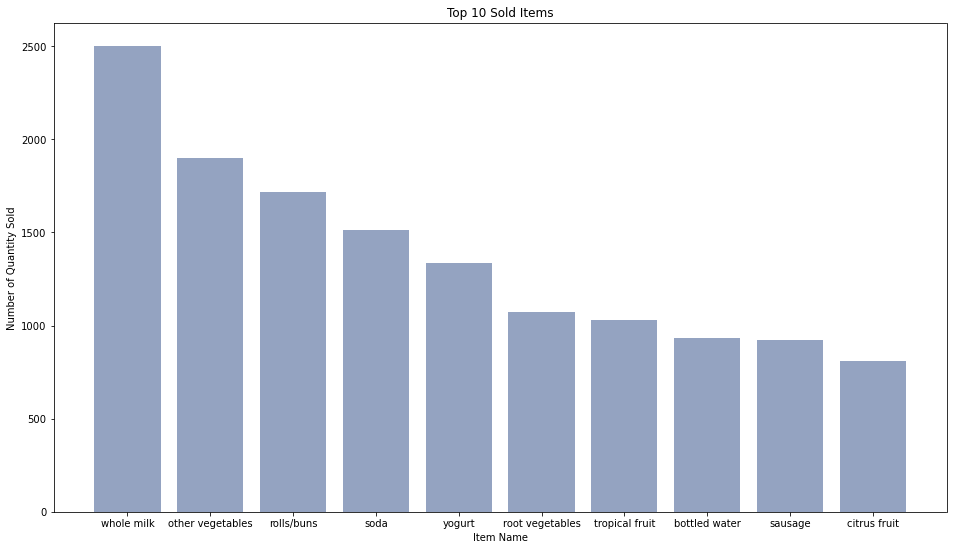

In [504]:
# 구매량 높은 상위 10개 상품
Item_distr = df3.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

plt.xticks(x_pos, bars)

plt.show()

In [135]:
# 2) 연도별 많이 / 적게 팔린 아이템은?
ddf3=df3.copy()
ddf3['year']=ddf3.index.year

In [140]:
ddf3.year.unique()
# 연도는 2014, 2015년 2개이다

array([2015, 2014], dtype=int64)

In [166]:
# 2014년 가장 많이 팔린 아이템
ddf3[ddf3['year']==2014].groupby('year')['itemDescription'].value_counts()[:1]
# 2014  whole milk         1038

# 2014년 가장 많이 적게 아이템
ddf3[ddf3['year']==2014].groupby('year')['itemDescription'].value_counts()[-1:]
# 2014  preservation products    1

year  itemDescription      
2014  preservation products    1
Name: itemDescription, dtype: int64

In [168]:
# 2015년 가장 많이 팔린 아이템
ddf3[ddf3['year']==2015].groupby('year')['itemDescription'].value_counts()[:1]
# 2015  whole milk         1464

# # 2015년 가장 많이 적게 아이템
ddf3[ddf3['year']==2015].groupby('year')['itemDescription'].value_counts()[-1:]
# 2015  specialty vegetables    1

year  itemDescription     
2015  specialty vegetables    1
Name: itemDescription, dtype: int64

In [ ]:
# 3) member id 에 따른 구매 연(월, 요일)도, 아이템 분석
# - 무슨 요일에 와서 구매를 많이 했을까?

In [240]:
df3['year']=df3.index.year
df3['month']=df3.index.month
df3['weekday']=df3.index.weekday

In [241]:
df3
# 0: 월요일, 1: 화요일, 2: 수요일, 3: 목요일, 4: 금요일, 5: 토요일, 6: 일요일

Member_number        itemDescription  year  month  weekday
Date                                                                  
2015-07-21           1808         tropical fruit  2015      7        1
2015-05-01           2552             whole milk  2015      5        4
2015-09-19           2300              pip fruit  2015      9        5
2015-12-12           1187       other vegetables  2015     12        5
2015-01-02           3037             whole milk  2015      1        4
...                   ...                    ...   ...    ...      ...
2014-08-10           4471          sliced cheese  2014      8        6
2014-02-23           2022                  candy  2014      2        6
2014-04-16           1097               cake bar  2014      4        2
2014-03-12           1510  fruit/vegetable juice  2014      3        2
2014-12-26           1521               cat food  2014     12        4

[38765 rows x 5 columns]

In [242]:
# 요일에 따른 아이템 구매 현황
dfp3=df3.groupby(['weekday'])['itemDescription'].describe().sort_values(by='count', ascending=False)
# 0: 월요일, 1: 화요일, 2: 수요일, 3: 목요일, 4: 금요일, 5: 토요일, 6: 일요일
dfp3.rename(index={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'},inplace=True)
dfp3
# 모든 요일의 구매량이 가장 많은 아이템은 whole milk이다.
# whole milk를 가장 많이 구매한 요일 순은 목요일, 수요일, 일요일, 화요일, 금요일, 토요일, 월요일이다.

count unique         top freq
weekday                                
Thursday   5754    160  whole milk  359
Wednesday  5663    161  whole milk  389
Sunday     5624    158  whole milk  378
Tuesday    5524    157  whole milk  343
Friday     5504    163  whole milk  337
Saturday   5397    158  whole milk  347
Monday     5299    163  whole milk  349

In [218]:
dfp3.index

Index(['Thursday', 'Wednesday', 'Sunday', 'Tuesday', 'Friday', 'Saturday',
       'Monday'],
      dtype='object', name='weekday')

In [219]:
# 요일별 whole milk 구매량 
fig = px.bar(dfp3, x=dfp3.index, y="count", color=dfp3.index)
fig.show()

In [270]:
d=df3.groupby('month')['itemDescription'].count().sort_values(ascending=False)
d

month
8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: itemDescription, dtype: int64

In [269]:
d=df3.groupby('month')['itemDescription'].count()
# 월별 아이템 구매량 
fig = px.bar(d.sort_values(), x=d.index, y=d, color=d.index)
fig.show()
# 8월에 구매량이 가장 높고, 9월에 구매량이 가장 낮다.

In [243]:
# 월별 whole milk 구매량
df3.groupby(['month'])['itemDescription'].describe().sort_values(by='count', ascending=False)

count unique         top freq
month                              
8      3498    155  whole milk  235
5      3335    150  whole milk  218
1      3333    154  whole milk  219
6      3316    152  whole milk  205
3      3283    150  whole milk  216
11     3273    151  whole milk  230
7      3268    150  whole milk  222
10     3218    151  whole milk  199
4      3172    158  whole milk  218
12     3074    153  whole milk  167
2      3032    146  whole milk  173
9      2963    148  whole milk  200

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

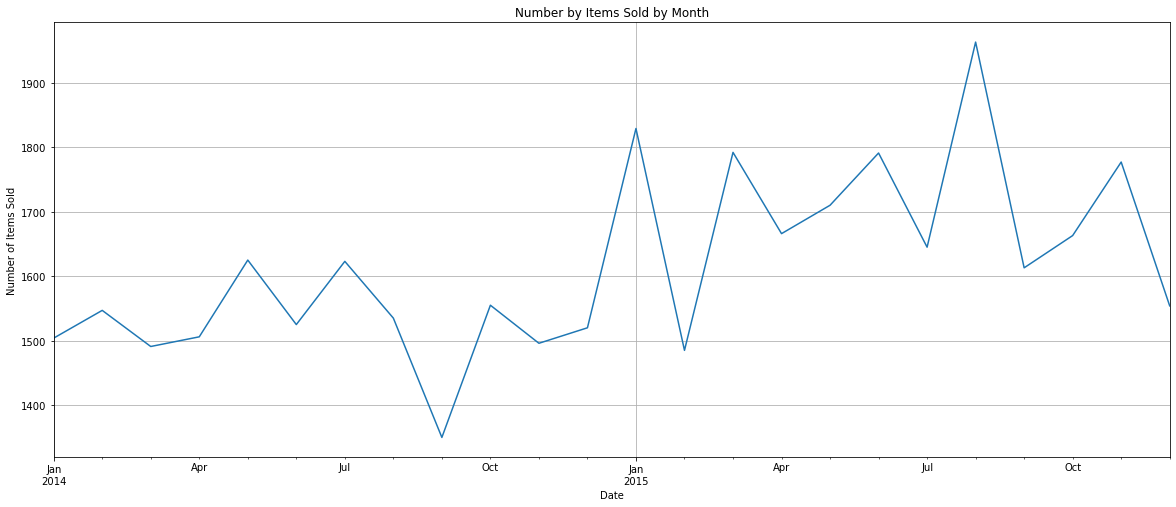

In [505]:
df3.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

In [484]:
# 4) 연관 규칙 생성

In [409]:
# apriori
transactions = [a[1]['itemDescription'].tolist() for a in list(df3.groupby(['Member_number','Date']))]

In [410]:
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

In [273]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [274]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [275]:
te_ary

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [276]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()

In [277]:
pf

Instant food products UHT-milk abrasive cleaner artif. sweetener  \
count                  14963    14963            14963            14963   
unique                     2        2                2                2   
top                    False    False            False            False   
freq                   14903    14643            14941            14934   

       baby cosmetics   bags baking powder bathroom cleaner   beef berries  \
count           14963  14963         14963            14963  14963   14963   
unique              2      2             2                2      2       2   
top             False  False         False            False  False   False   
freq            14960  14959         14842            14946  14455   14637   

        ... turkey vinegar waffles whipped/sour cream whisky white bread  \
count   ...  14963   14963   14963              14963  14963       14963   
unique  ...      2       2       2                  2      2           2   
top     ...  False   False   False              False  False       False   
freq    ...  14883   14912   14686              14309  14955       14604   

       white wine whole milk yogurt zwieback  
count       14963      14963  14963    14963  
unique          2          2      2        2  
top         False      False  False    False  
freq        14788      12600  13678    14903  

[4 rows x 167 columns]

In [278]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      False     False             False             False   
1                      False     False             False             False   
2                      False     False             False             False   
3                      False     False             False             False   
4                      False     False             False             False   
...                      ...       ...               ...               ...   
14958                  False     False             False             False   
14959                  False     False             False             False   
14960                  False     False             False             False   
14961                  False     False             False             False   
14962                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0               False  False          False             False  False    False   
1               False  False          False             False  False    False   
2               False  False          False             False  False    False   
3               False  False          False             False  False    False   
4               False  False          False             False  False    False   
...               ...    ...            ...               ...    ...      ...   
14958           False  False          False             False  False    False   
14959           False  False          False             False  False    False   
14960           False  False          False             False  False    False   
14961           False  False          False             False  False    False   
14962           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0      ...   False    False    False               False   False        False   
1      ...   False    False    False               False   False        False   
2      ...   False    False    False               False   False        False   
3      ...   False    False    False               False   False        False   
4      ...   False    False    False               False   False        False   
...    ...     ...      ...      ...                 ...     ...          ...   
14958  ...   False    False    False                True   False        False   
14959  ...   False    False    False               False   False        False   
14960  ...   False    False    False               False   False        False   
14961  ...   False    False    False               False   False        False   
14962  ...   False    False    False               False   False        False   

       white wine  whole milk  yogurt  zwieback  
0           False        True   False     False  
1           False        True    True     False  
2           False       False   False     False  
3           False       False   False     False  
4           False       False   False     False  
...           ...         ...     ...       ...  
14958       False       False   False     False  
14959       False       False   False     False  
14960       False       False   False     False  
14961       False       False   False     False  
14962       False       False   False     False  

[14963 rows x 167 columns]

In [279]:
item

Count                      Item
164   2363                whole milk
102   1827          other vegetables
122   1646                rolls/buns
138   1453                      soda
165   1285                    yogurt
123   1041           root vegetables
156   1014            tropical fruit
12     908             bottled water
130    903                   sausage
30     795              citrus fruit
105    774                    pastry
109    734                 pip fruit
133    712             shopping bags
20     702               canned beer
11     678              bottled beer
160    654        whipped/sour cream
95     582                newspapers
56     565               frankfurter
14     563               brown bread
111    555                      pork
49     555             domestic eggs
15     527                    butter
64     509     fruit/vegetable juice
8      508                      beef
40     504                      curd
88     482                 margarine
34     473                    coffee
63     419         frozen vegetables
27     417                   chicken
162    359               white bread
39     354             cream cheese 
28     353                 chocolate
44     353                   dessert
94     331                   napkins
68     327            hamburger meat
9      326                   berries
1      320                  UHT-milk
99     303                    onions
128    281               salty snack
159    277                   waffles
85     268  long life bakery product
150    265                     sugar
16     263               butter milk
67     256                       ham
90     252                      meat
61     251              frozen meals
10     248                 beverages
145    239       specialty chocolate
92     236           misc. beverages
74     227                 ice cream

In [280]:
!pip install wordcloud

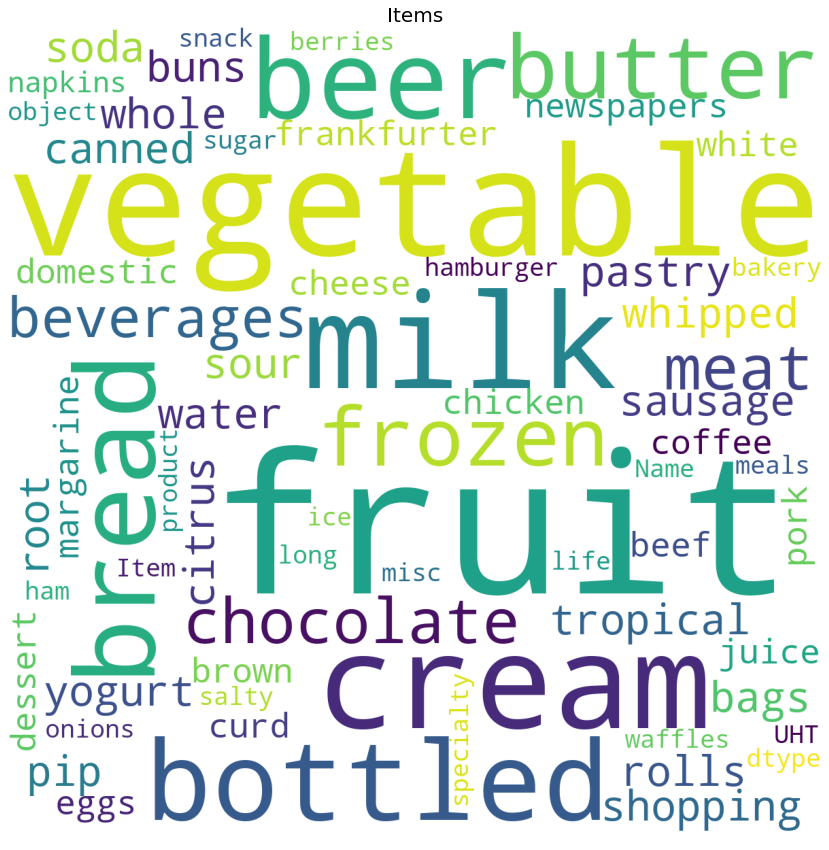

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()
# vegetable, fruit, mil, cream, bottled가 크게 보인다.

In [282]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

C:\Users\tjdbs\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [283]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [284]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(3)

Processing 28 combinations | Sampling itemset size 4e 3


support                 itemsets
0  0.004010  (Instant food products)
1  0.021386               (UHT-milk)
2  0.001470       (abrasive cleaner)

In [285]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [286]:
freq_items.head(10)

support                 itemsets  length
0  0.004010  (Instant food products)       1
1  0.021386               (UHT-milk)       1
2  0.001470       (abrasive cleaner)       1
3  0.001938       (artif. sweetener)       1
4  0.008087          (baking powder)       1
5  0.001136       (bathroom cleaner)       1
6  0.033950                   (beef)       1
7  0.021787                (berries)       1
8  0.016574              (beverages)       1
9  0.045312           (bottled beer)       1

In [287]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

antecedents         consequents  antecedent support  \
0          (UHT-milk)     (bottled water)            0.021386   
1     (bottled water)          (UHT-milk)            0.060683   
2          (UHT-milk)  (other vegetables)            0.021386   
3  (other vegetables)          (UHT-milk)            0.122101   
4          (UHT-milk)        (rolls/buns)            0.021386   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.060683  0.001069    0.050000  0.823954 -0.000228    0.988755  
1            0.021386  0.001069    0.017621  0.823954 -0.000228    0.996168  
2            0.122101  0.002139    0.100000  0.818993 -0.000473    0.975443  
3            0.021386  0.002139    0.017515  0.818993 -0.000473    0.996060  
4            0.110005  0.001804    0.084375  0.767013 -0.000548    0.972009

In [294]:
rules.sort_values(by=['lift'], ascending=False).head(5)  # lift가 높은 상위 5개

antecedents            consequents  antecedent support  \
1236              (sausage)   (whole milk, yogurt)            0.060349   
1233   (whole milk, yogurt)              (sausage)            0.011161   
1232  (whole milk, sausage)               (yogurt)            0.008955   
1237               (yogurt)  (whole milk, sausage)            0.085879   
474   (specialty chocolate)         (citrus fruit)            0.015973   

      consequent support   support  confidence      lift  leverage  conviction  
1236            0.011161  0.001470    0.024363  2.182917  0.000797    1.013532  
1233            0.060349  0.001470    0.131737  2.182917  0.000797    1.082219  
1232            0.085879  0.001470    0.164179  1.911760  0.000701    1.093681  
1237            0.008955  0.001470    0.017121  1.911760  0.000701    1.008307  
474             0.053131  0.001403    0.087866  1.653762  0.000555    1.038081

In [ ]:
# lift가 높은 순
# 고객들은 주로
sausage --> whole milk, yogurt
whole milk, yogurt --> sausage
whole milk, sausage --> yogurt
yogurt --> whole milk, sausage
specialty chocolate --> citrus  fruit
# 를 산다.
# 즉, sausage/whole milk/yogurt 상품은 같이 진열하는 것이 구매율을 높일 것이다.

In [288]:
# support와 confidence 관계
fig=px.scatter(rules['support'], rules['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)
fig.show()

C:\Users\tjdbs\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\tjdbs\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [289]:
# support와 lift 관계
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Lift')  
)
fig.show()

C:\Users\tjdbs\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\tjdbs\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Text(0.5, 1.0, 'lift vs Confidence')

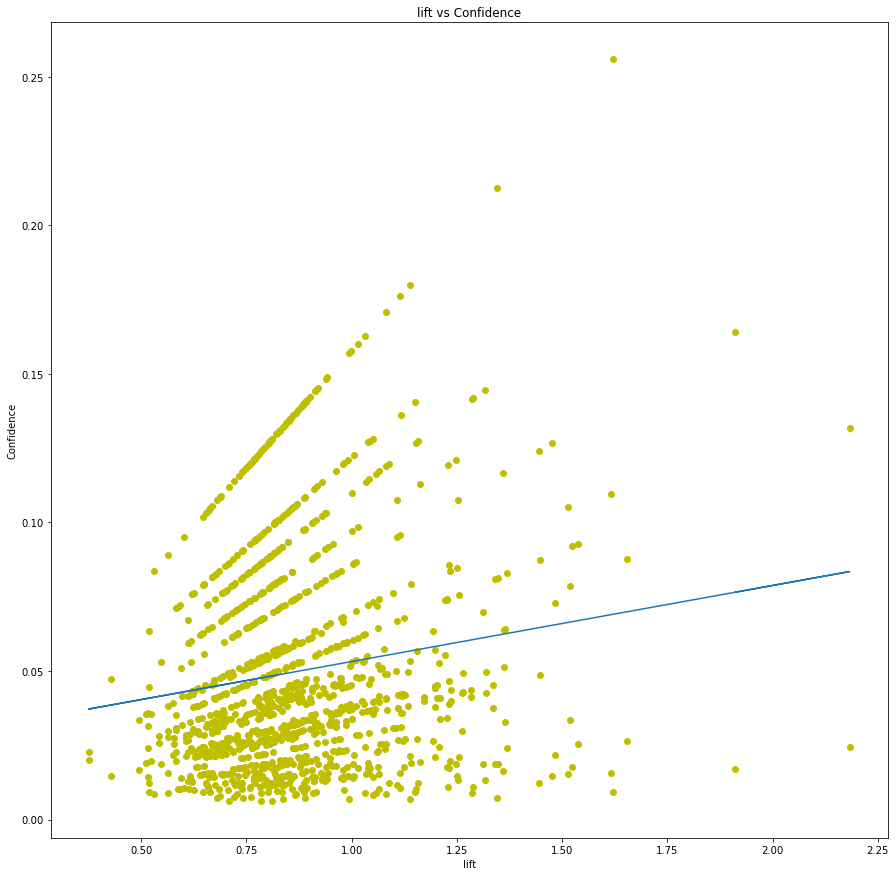

In [290]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

In [ ]:
# 5) 연관 규칙에 따른 vip member에게 어떤 상품을 추천할까?
# -vip는 매출횟수가 가장 많은 상위 100명 

In [535]:
# 매출 상위 100명 고객
# data=df3.groupby(['Member_number'])['itemDescription'].value_counts().sort_values(ascending=False)[:101]
# data=pd.DataFrame(data)
# data.rename(columns={0:'count'}, inplace=True)
# # data=data.droplevel(1)
# data=data.unstack().T
# data

Text(0.5, 1.0, 'Top 10 customers')

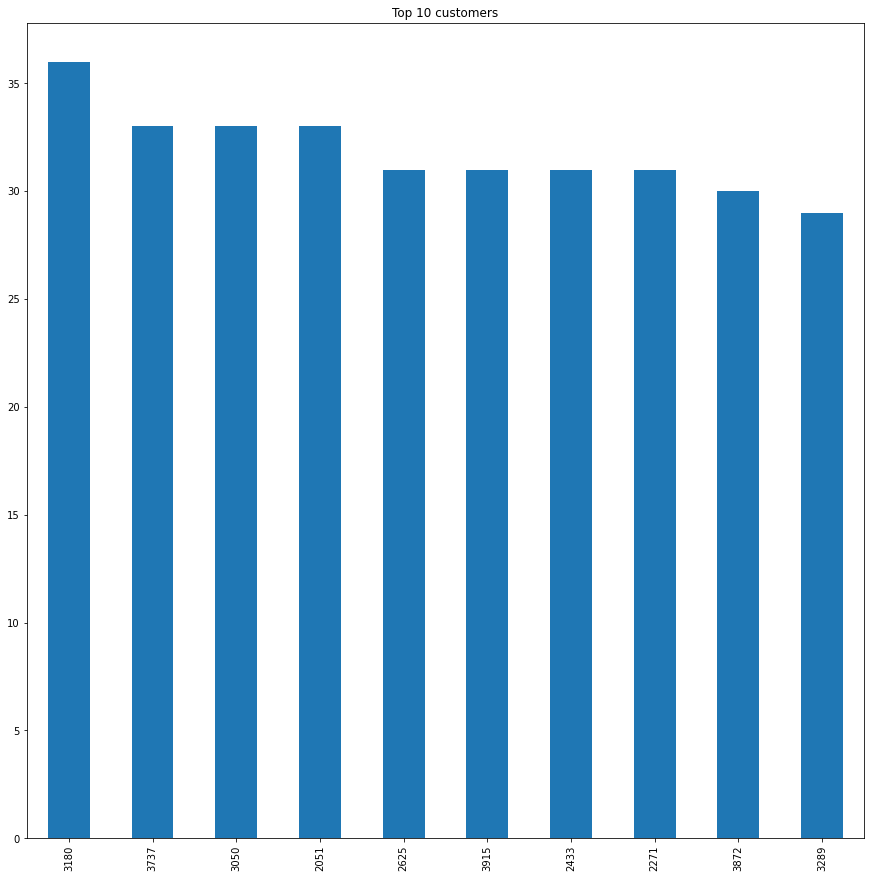

In [518]:
# Vip 고객 10명
df3.Member_number.value_counts().head(10).plot.bar()
plt.title('Top 10 customers')

In [506]:
# Member_number별 구매상품
cust_level = df3[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) 
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

Member_number        itemDescription
Date                                            
2015-10-02           5000                   soda
2015-10-02           5000    semi-finished bread
2014-09-03           5000  fruit/vegetable juice
2014-11-16           5000           bottled beer
2015-10-02           5000        root vegetables
...                   ...                    ...
2014-06-24           1000             whole milk
2015-05-27           1000     pickled vegetables
2015-11-25           1000                sausage
2015-03-15           1000    semi-finished bread
2015-03-15           1000             whole milk

[38765 rows x 2 columns]

In [564]:
# 매출 상위 10명 고객
cm=df3.Member_number.value_counts()[:100]
cm.index

Int64Index([3180, 3737, 3050, 2051, 2625, 3915, 2433, 2271, 3872, 3289, 4875,
            2851, 2394, 4338, 1379, 3308, 4831, 2524, 1052, 2193, 1410, 4272,
            3752, 1998, 2517, 2663, 4695, 4376, 4486, 3082, 1905, 2512, 4137,
            4941, 2960, 1265, 1870, 2440, 4864, 1366, 3462, 1793, 4303, 4217,
            2344, 2164, 1098, 2632, 3120, 2070, 3957, 2184, 2560, 1116, 2816,
            1275, 4828, 3247, 3122, 2990, 2760, 3497, 3942, 1654, 4277, 2294,
            2789, 3484, 3783, 4437, 1395, 1466, 1827, 4495, 4753, 3960, 3221,
            2022, 2855, 4297, 3593, 1574, 2706, 2736, 1407, 1991, 3046, 3691,
            3830, 4251, 3090, 4524, 3465, 3246, 4671, 4364, 3361, 3517, 3543,
            4153],
           dtype='int64')

In [507]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] 

In [508]:
rules = apriori(transactions = transactions, 
                min_support = 0.002, min_confidence = 0.05, 
                min_lift = 3, min_length = 2, max_length = 2)

In [509]:
results = list(rules) 

In [510]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [511]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [512]:
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [513]:
resultsinDataFrame.nlargest(n=10, columns="Lift") 


Left Hand Side Right Hand Side   Support  Confidence      Lift
0   kitchen towels        UHT-milk  0.002309    0.300000  3.821569
1  potato products            beef  0.002565    0.454545  3.802185
2     canned fruit          coffee  0.002309    0.428571  3.728954
4            flour      mayonnaise  0.002309    0.063380  3.338599
6   sparkling wine         waffles  0.002565    0.217391  3.150154
5             rice         napkins  0.003079    0.244898  3.011395
3     meat spreads   domestic eggs  0.003592    0.400000  3.004239

In [ ]:
# Vip 고객들은 주로
kitchen towels --> UHT-milk
potato products --> beef
canned fruit --> coffee
flour --> mayonnaise
# 를 산다

# 4번

In [ ]:
# 4. 와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터이다. 
# load_wine() 명령으로 로드하며 다음과 같이 구성되어 있다. 
# 와인의 종류를 예측할 수 있는 모델을 생성하시오.
# from sklearn.datasets import load_wine
# wine = load_wine()
# print(wine.DESCR)
# * 타겟 데이터
# 와인의 종류 0, 1, 2의 세가지 값
# * 특징 데이터
# 알콜(Alcohol),말산(Malic acid),회분(Ash),회분의 알칼리도(Alcalinity of ash), ...

In [312]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf

C:\Users\tjdbs\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning:

Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.

C:\Users\tjdbs\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning:

Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.

C:\Users\tjdbs\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:43: DeprecationWarning:

Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.

C:\Users\tjdbs\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_p

In [295]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [296]:
# 종류별 속성값 특성 시각화
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline    class  
173                          1.74    740.0  class_2  
174                          1.56    750.0  class_2  
175                          1.56    835.0  class_2  
176                          1.62    840.0  class_2  
177                          1.60    560.0  class_2

C:\Users\tjdbs\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\tjdbs\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



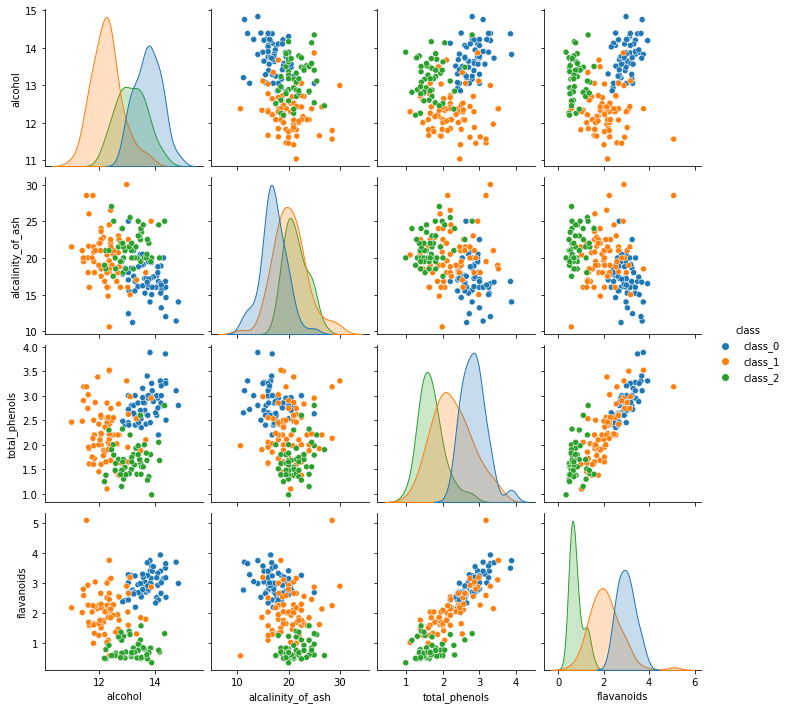

In [297]:
# 일부 특징값의 분포와 상관관계를 히스토그램과 스캐터플롯으로 나타내기
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()

In [314]:
# 와인 종류 예측모델
x=wine.data
y=wine.target

In [370]:
x[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [315]:
(X_train, X_test, y_train, y_test) = train_test_split(x, y, train_size=0.8, random_state=1)

In [317]:
y_train.shape  # (142,)
X_train.shape  # (142, 13)

(142, 13)

In [ ]:
# 다중선형회귀모델

In [366]:
model=Sequential()
model.add(Dense(1, input_dim=13, activation='linear'))  # 출력 : 1, 입력 : 3차원 데이터
sgd=tf.optimizers.SGD(lr=0.000001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

In [367]:
model.fit(x, y, epochs=1000)

Epoch 1/1000
6/6 [==============================] - 0s 2ms/step - loss: 17434.6074 - mse: 17434.6074
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 301.3234 - mse: 301.3234
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 297.7513 - mse: 297.7513
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 293.3945 - mse: 293.3945
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 371.8133 - mse: 371.8133
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 269.2758 - mse: 269.2758
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 250.2093 - mse: 250.2093
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 254.6868 - mse: 254.6868
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 234.9224 - mse: 234.9224
Epoch 10/1000
6/6 [==============================] - 0s 2ms/step - loss: 228.8662 - mse: 228.8662
Epoch 11/1000
6/6 [======

6/6 [==============================] - 0s 4ms/step - loss: 20.1753 - mse: 20.1753
Epoch 85/1000
6/6 [==============================] - 0s 5ms/step - loss: 19.7082 - mse: 19.7082
Epoch 86/1000
6/6 [==============================] - 0s 4ms/step - loss: 20.6346 - mse: 20.6346
Epoch 87/1000
6/6 [==============================] - 0s 6ms/step - loss: 20.5672 - mse: 20.5672
Epoch 88/1000
6/6 [==============================] - 0s 3ms/step - loss: 17.7204 - mse: 17.7204
Epoch 89/1000
6/6 [==============================] - 0s 3ms/step - loss: 17.3391 - mse: 17.3391
Epoch 90/1000
6/6 [==============================] - 0s 3ms/step - loss: 16.6601 - mse: 16.6601
Epoch 91/1000
6/6 [==============================] - 0s 2ms/step - loss: 16.7042 - mse: 16.7042
Epoch 92/1000
6/6 [==============================] - 0s 2ms/step - loss: 15.6802 - mse: 15.6802
Epoch 93/1000
6/6 [==============================] - 0s 3ms/step - loss: 15.4386 - mse: 15.4386
Epoch 94/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: 2.6350 - mse: 2.6350
Epoch 171/1000
6/6 [==============================] - 0s 2ms/step - loss: 2.5077 - mse: 2.5077
Epoch 172/1000
6/6 [==============================] - 0s 2ms/step - loss: 2.4960 - mse: 2.4960
Epoch 173/1000
6/6 [==============================] - 0s 3ms/step - loss: 2.3626 - mse: 2.3626
Epoch 174/1000
6/6 [==============================] - 0s 2ms/step - loss: 2.5808 - mse: 2.5808
Epoch 175/1000
6/6 [==============================] - 0s 3ms/step - loss: 2.4023 - mse: 2.4023
Epoch 176/1000
6/6 [==============================] - 0s 2ms/step - loss: 2.2389 - mse: 2.2389
Epoch 177/1000
6/6 [==============================] - 0s 3ms/step - loss: 2.5031 - mse: 2.5031
Epoch 178/1000
6/6 [==============================] - 0s 2ms/step - loss: 2.1420 - mse: 2.1420
Epoch 179/1000
6/6 [==============================] - 0s 3ms/step - loss: 2.2941 - mse: 2.2941
Epoch 180/1000
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 2ms/step - loss: 1.5458 - mse: 1.5458
Epoch 257/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4387 - mse: 1.4387
Epoch 258/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.5171 - mse: 1.5171
Epoch 259/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.7662 - mse: 1.7662
Epoch 260/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4536 - mse: 1.4536
Epoch 261/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4803 - mse: 1.4803
Epoch 262/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4740 - mse: 1.4740
Epoch 263/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4971 - mse: 1.4971
Epoch 264/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.6435 - mse: 1.6435
Epoch 265/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4103 - mse: 1.4103
Epoch 266/1000
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 2ms/step - loss: 1.3715 - mse: 1.3715
Epoch 343/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4038 - mse: 1.4038
Epoch 344/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4319 - mse: 1.4319
Epoch 345/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3765 - mse: 1.3765
Epoch 346/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.8367 - mse: 1.8367
Epoch 347/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.7332 - mse: 1.7332
Epoch 348/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3831 - mse: 1.3831
Epoch 349/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4268 - mse: 1.4268
Epoch 350/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3743 - mse: 1.3743
Epoch 351/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.5751 - mse: 1.5751
Epoch 352/1000
6/6 [==============================] - 0s 2ms/step

Epoch 428/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3487 - mse: 1.3487
Epoch 429/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4229 - mse: 1.4229
Epoch 430/1000
6/6 [==============================] - ETA: 0s - loss: 1.3476 - mse: 1.347 - 0s 7ms/step - loss: 1.3441 - mse: 1.3441
Epoch 431/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.3634 - mse: 1.3634
Epoch 432/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3873 - mse: 1.3873
Epoch 433/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3352 - mse: 1.3352
Epoch 434/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.3498 - mse: 1.3498
Epoch 435/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.3326 - mse: 1.3326
Epoch 436/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3445 - mse: 1.3445
Epoch 437/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.4273 - mse: 1.4273
Epoch 438/10

6/6 [==============================] - 0s 3ms/step - loss: 1.4224 - mse: 1.4224
Epoch 514/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4346 - mse: 1.4346
Epoch 515/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4732 - mse: 1.4732
Epoch 516/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3928 - mse: 1.3928
Epoch 517/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3655 - mse: 1.3655
Epoch 518/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.5098 - mse: 1.5098
Epoch 519/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3789 - mse: 1.3789
Epoch 520/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4790 - mse: 1.4790
Epoch 521/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3913 - mse: 1.3913
Epoch 522/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4318 - mse: 1.4318
Epoch 523/1000
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 2ms/step - loss: 1.3876 - mse: 1.3876
Epoch 600/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3327 - mse: 1.3327
Epoch 601/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3484 - mse: 1.3484
Epoch 602/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3242 - mse: 1.3242
Epoch 603/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3302 - mse: 1.3302
Epoch 604/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4089 - mse: 1.4089
Epoch 605/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4397 - mse: 1.4397
Epoch 606/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4634 - mse: 1.4634
Epoch 607/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3303 - mse: 1.3303
Epoch 608/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4140 - mse: 1.4140
Epoch 609/1000
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 2ms/step - loss: 1.4250 - mse: 1.4250
Epoch 686/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4517 - mse: 1.4517
Epoch 687/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3434 - mse: 1.3434
Epoch 688/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3455 - mse: 1.3455
Epoch 689/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3514 - mse: 1.3514
Epoch 690/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4186 - mse: 1.4186
Epoch 691/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.5748 - mse: 1.5748
Epoch 692/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3317 - mse: 1.3317
Epoch 693/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3575 - mse: 1.3575
Epoch 694/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3224 - mse: 1.3224
Epoch 695/1000
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 2ms/step - loss: 1.3174 - mse: 1.3174
Epoch 772/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3873 - mse: 1.3873
Epoch 773/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3340 - mse: 1.3340
Epoch 774/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4288 - mse: 1.4288
Epoch 775/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3389 - mse: 1.3389
Epoch 776/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.7609 - mse: 1.7609
Epoch 777/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3687 - mse: 1.3687
Epoch 778/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3548 - mse: 1.3548
Epoch 779/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3303 - mse: 1.3303
Epoch 780/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3808 - mse: 1.3808
Epoch 781/1000
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 2ms/step - loss: 1.4954 - mse: 1.4954
Epoch 858/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3066 - mse: 1.3066
Epoch 859/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3671 - mse: 1.3671
Epoch 860/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4862 - mse: 1.4862
Epoch 861/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3093 - mse: 1.3093
Epoch 862/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4111 - mse: 1.4111
Epoch 863/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4382 - mse: 1.4382
Epoch 864/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3606 - mse: 1.3606
Epoch 865/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.2905 - mse: 1.2905
Epoch 866/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3133 - mse: 1.3133
Epoch 867/1000
6/6 [==============================] - 0s 3ms/step

Epoch 943/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3521 - mse: 1.3521
Epoch 944/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4758 - mse: 1.4758
Epoch 945/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3315 - mse: 1.3315
Epoch 946/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4597 - mse: 1.4597
Epoch 947/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3090 - mse: 1.3090
Epoch 948/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.4085 - mse: 1.4085
Epoch 949/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.3341 - mse: 1.3341
Epoch 950/1000
6/6 [==============================] - ETA: 0s - loss: 1.8639 - mse: 1.863 - 0s 3ms/step - loss: 1.4607 - mse: 1.4607
Epoch 951/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3342 - mse: 1.3342
Epoch 952/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.2766 - mse: 1.2766
Epoch 953/10

In [368]:
model.predict(x)

array([[-5.88496216e-02],
       [-1.48308301e+00],
       [ 7.62065113e-01],
       [-2.71210849e-01],
       [ 1.40803301e+00],
       [-7.40668118e-01],
       [-8.28950942e-01],
       [ 7.38653958e-01],
       [-1.99418938e+00],
       [-5.88700950e-01],
       [ 2.74878919e-01],
       [-2.13943645e-01],
       [-4.51233804e-01],
       [-2.93237805e+00],
       [-1.82948256e+00],
       [ 4.36161935e-01],
       [ 7.75536835e-01],
       [ 6.53597653e-01],
       [-3.83977473e-01],
       [-5.37264109e-01],
       [-2.87359059e-01],
       [ 8.29698563e-01],
       [ 4.13662307e-02],
       [ 9.25186336e-01],
       [ 1.01140094e+00],
       [ 3.20193744e+00],
       [-2.66661346e-01],
       [ 2.38523200e-01],
       [ 6.26416862e-01],
       [-4.08519626e-01],
       [ 1.53524375e+00],
       [ 8.85632813e-01],
       [-2.41942890e-02],
       [ 1.40816188e+00],
       [ 9.65180218e-01],
       [ 9.60973740e-01],
       [-1.72118470e-01],
       [ 5.99713385e-01],
       [-3.3

In [ ]:
# 랜덤포레스트

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [372]:
x_train,x_test,y_train,y_test=train_test_split(x, y,
                                               test_size=0.25,random_state=20221125)

In [375]:
models=[RandomForestRegressor(), BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','BaggingRegressor','SVR','KNeighborsRegressor']

In [376]:
rmse=[]
for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train, y_train)
    test_pred=clf.predict(x_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test))) # RMSE

In [377]:
rmse # 0.25541687058175655 => 랜덤포레스트 모델이 가장 좋다

[0.25541687058175655,
 0.3467307633052225,
 0.4777671009331038,
 0.681175454637056]

In [378]:
# 랜덤포레스트 gridsearch
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)

In [379]:
np.sqrt(mean_squared_error(pred,y_test))
# 0.2016771898080913

0.2016771898080913

In [383]:
pred=clf_rf.predict(x)
res={'Close_anser':y,
      'Close_Predict':pred}
pd.DataFrame(res).head(50)

Close_anser  Close_Predict
0             0          0.000
1             0          0.030
2             0          0.016
3             0          0.098
4             0          0.418
5             0          0.000
6             0          0.000
7             0          0.026
8             0          0.010
9             0          0.020
10            0          0.006
11            0          0.094
12            0          0.048
13            0          0.024
14            0          0.012
15            0          0.006
16            0          0.018
17            0          0.052
18            0          0.034
19            0          0.164
20            0          0.214
21            0          0.192
22            0          0.030
23            0          0.070
24            0          0.144
25            0          0.368
26            0          0.006
27            0          0.104
28            0          0.042
29            0          0.068
30            0          0.100
31            0          0.002
32            0          0.036
33            0          0.044
34            0          0.112
35            0          0.036
36            0          0.110
37            0          0.072
38            0          0.042
39            0          0.228
40            0          0.226
41            0          0.136
42            0          0.012
43            0          0.266
44            0          0.106
45            0          0.194
46            0          0.018
47            0          0.006
48            0          0.002
49            0          0.030

In [384]:
pd.DataFrame(res).tail(50)

Close_anser  Close_Predict
128            1          1.000
129            1          1.086
130            2          1.902
131            2          1.990
132            2          1.986
133            2          1.978
134            2          1.888
135            2          1.992
136            2          1.942
137            2          1.986
138            2          1.992
139            2          1.836
140            2          1.712
141            2          1.808
142            2          1.948
143            2          1.916
144            2          1.942
145            2          1.948
146            2          1.946
147            2          2.000
148            2          1.998
149            2          1.966
150            2          1.866
151            2          1.968
152            2          1.910
153            2          1.978
154            2          1.956
155            2          1.994
156            2          1.990
157            2          1.928
158            2          1.900
159            2          1.940
160            2          1.926
161            2          1.908
162            2          1.946
163            2          1.996
164            2          2.000
165            2          1.996
166            2          1.966
167            2          2.000
168            2          1.984
169            2          1.966
170            2          1.988
171            2          1.978
172            2          2.000
173            2          2.000
174            2          1.984
175            2          1.994
176            2          1.988
177            2          1.986

In [ ]:
# 예측 결과가 어느정도 정답과 근접한 것 같다.